# Data Mining Project Report

### **1. Problem:**

**What is the Problem?**
Employee attrition, or the rate at which employees leave a company, is a critical challenge for organizations. High attrition rates can lead to increased recruitment and training costs, lower morale, and disruption of business operations. Understanding the factors contributing to employee attrition can help organizations address these issues effectively.

**What Do You Want to Solve?**
The goal of this project is to analyze the factors that influence employee attrition and predict which employees are more likely to leave the organization. By identifying these factors, we can help companies take proactive measures to retain valuable employees.

**Why Is It Important?**
Employee retention is crucial for maintaining a skilled and experienced workforce, reducing operational costs, and ensuring business continuity. Addressing attrition through data-driven insights enables organizations to:
1. Enhance employee satisfaction.
2. Improve workplace policies.
3. Allocate resources more effectively.
4. Maintain a competitive edge in the industry.

This analysis will provide actionable insights into improving employee retention strategies, ultimately saving costs and boosting organizational productivity.

### **2. Data Mining Task**

**Formalizing the Problem**  
The problem of understanding and predicting employee attrition can be formalized as a **classification task**. The goal is to categorize employees into two classes:
- **Class 1 (Attrition = Yes):** Employees who are likely to leave the organization.
- **Class 0 (Attrition = No):** Employees who are likely to stay in the organization.

Additionally, clustering techniques can be used as a supplementary task to group employees based on similar characteristics, such as job satisfaction, salary, and workload, which can help uncover hidden patterns in the data.

---

**Class Attribute for Classification**  
The target (class) attribute in this dataset is **`Attrition`**, where:
- `Yes` indicates that the employee left the organization.
- `No` indicates that the employee stayed.

---

**Goals of the Data Mining Tasks**
1. **Classification Task**:
   - Develop a predictive model to identify which employees are likely to leave the organization based on their attributes.
   - Understand the importance of features contributing to attrition, such as job satisfaction, income, and overtime.

2. **Clustering Task** :
   - Group employees into clusters to uncover patterns that might not be obvious in the raw data.
   - Identify high-risk employee segments (e.g., low satisfaction and high overtime).

---


## 3. Data



 -**Source**: The dataset was obtained from Kaggle. You can find the dataset at the following link:

[IBM HR Analytics Employee Attrition Dataset on Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
 
 -**General Information about the Dataset**:
 
 * Number of Attributes (Columns): 35 attributes

* Number of Objects (Rows): 1470 records

* Class Name/Label: Attrition (Yes/No)

-**Types of Attributes**:
 
 | Numerical Attributes       | Categorical Attributes  |
|----------------------------|-------------------------|
| Age                        | Attrition               |
| DailyRate                  | BusinessTravel          |
| DistanceFromHome           | Department              |
| Education                  | EducationField          |
| EmployeeCount              | Gender                  |
| EmployeeNumber             | JobRole                 |
| EnvironmentSatisfaction     | MaritalStatus           |
| HourlyRate                 | Over18                  |
| JobInvolvement             | OverTime                |
| JobLevel                   |                         |
| JobSatisfaction            |                         |
| MonthlyIncome              |                         |
| MonthlyRate                |                         |
| NumCompaniesWorked         |                         |
| PercentSalaryHike          |                         |
| PerformanceRating          |                         |
| RelationshipSatisfaction   |                         |
| StandardHours              |                         |
| StockOptionLevel           |                         |
| TotalWorkingYears          |                         |
| TrainingTimesLastYear      |                         |
| WorkLifeBalance            |                         |
| YearsAtCompany             |                         |
| YearsInCurrentRole         |                         |
| YearsSinceLastPromotion    |                         |
| YearsWithCurrManager       |                         |




In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

-**Show the missing value**:

In [2]:
missing_values = df.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values)


Missing Values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

The output of the isnull().sum() function indicates that there are no missing values in any of the columns. This is a good sign since we don't need to perform any imputation, simplifying our preprocessing pipeline.

-**Show the duplicates value**:

First, we count the number of duplicates rows, and then we remove them:

In [4]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


This code checks for and removes duplicate rows if we need it from the dataset, confirming that there are 0 duplicate rows, ensuring data integrity for analysis.

### - Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max. for each numeric column:

Using the `describe()` function, we can observe key statistics for each numeric column in the dataset:
1. **Age**: The age of employees ranges from 18 to 60 years, with a mean age of approximately 36.92. This indicates a relatively young workforce with a standard deviation of about 9.14 years.
   
2. **DailyRate**: The daily rates vary significantly from 102 to 1499, with a mean of 802.49, suggesting substantial differences in pay among employees.

3. **DistanceFromHome**: Employees live an average of 9.19 units away from the workplace, with distances ranging from 1 to 29.

4. **Education**: The education level has a mean of 2.91, indicating that most employees have completed a degree, with levels ranging from 1 to 5.

5. **EmployeeCount**: The EmployeeCount is constant at 1 for all entries, suggesting no variability in this feature, making it non-informative for analysis.

6. **EmployeeNumber**: Employee numbers range from 1 to 2068, with a mean of 1024.87.

7. **EnvironmentSatisfaction**: Employees report a mean satisfaction level of 2.72, with values ranging from 1 to 4.

8. **HourlyRate**: The hourly rate ranges from 30 to 100, with a mean of 65.89.

9. **JobInvolvement**: Job involvement has a mean of 2.73, suggesting moderate involvement among employees.

10. **JobLevel**: The average job level is about 2.06, indicating a mix of job positions.

11. **JobSatisfaction**: Employees report an average job satisfaction score of 2.71.

12. **MaritalStatus**: The marital status of employees has a consistent mean, reflecting their demographics.

13. **MonthlyIncome**: The monthly income varies widely, with a mean of 6505.67.

14. **TotalWorkingYears**: Employees have a mean of 11.28 years of total working experience, with a maximum of 40 years.

15. **WorkLifeBalance**: The average score for work-life balance is 2.76, indicating a reasonable balance.

16. **YearsAtCompany**: The average tenure at the company is 7.01 years, suggesting some employees are long-term.

17. **YearsInCurrentRole**: The average is 4.23 years, indicating stability in roles.

18. **YearsSinceLastPromotion**: Employees have a mean of 2.19 years since their last promotion, suggesting opportunities for growth.

19. **YearsWithCurrManager**: The average time with the current manager is 4.12 years, indicating relatively stable managerial relationships.

In [5]:
summary_stats=df.describe();
print(summary_stats);

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

-**Show the Variance**:

Variance helps understand the extent of dispersion or scatter of values in each column. As the variance increases, it indicates that the values are more spread out and scattered away from the mean, whereas decreasing variance suggests that the values are less scattered and closer to the mean value. Therefore, our variance results indicate:

- **Age** has a relatively high variance (83.45), suggesting that there is significant variability in the ages of employees.
- **DailyRate** shows the highest variance (162,819.6), indicating a wide range of daily salaries among employees.
- **DistanceFromHome** has a moderate variance (65.72), suggesting that employees live at varying distances from the workplace.
- **Education** and **EnvironmentSatisfaction** have low variances (1.05 and 1.19, respectively), indicating that most employees fall into a similar educational background and have comparable levels of satisfaction with their environment.
- **EmployeeCount** and **StandardHours** have a variance of 0, indicating that these values are constant across all records.
- **JobInvolvement**, **JobLevel**, and **JobSatisfaction** also have relatively low variances (0.51, 1.23, and 1.22, respectively), suggesting consistency in job involvement and satisfaction among employees.
- **MonthlyIncome** has a very high variance (22,164,860), indicating that there are substantial differences in salaries among employees.
- **MonthlyRate** exhibits the highest variance (50,662,880), suggesting extreme variability in the monthly rate employees receive.
- **TotalWorkingYears** and **YearsAtCompany** show moderate variances (60.54 and 37.53), indicating a range of experiences among employees.


In [6]:
variance= df.var(numeric_only=True);
print(variance);

Age                         8.345505e+01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EmployeeCount               0.000000e+00
EmployeeNumber              3.624333e+05
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StandardHours               0.000000e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRole          1.312712e+01
YearsSinceLastPr

Overall, these variance results highlight which employee attributes exhibit significant variability, which can be valuable for identifying trends and understanding the workforce dynamics within the organization.

-**Show outliers**:

To show the outliers we did choose the IQR method Based on our dataset to identify how many outliers in our dataset.

In [ ]:
import pandas as pd
data = pd.read_csv(('Dataset/Dataset_HR_Employee-Attrition.csv'))
import numpy as np
outlier_threshold = 3

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
DailyRate: 0 rows with outliers
DistanceFromHome: 0 rows with outliers
Education: 0 rows with outliers
EmployeeCount: 0 rows with outliers
EmployeeNumber: 0 rows with outliers
EnvironmentSatisfaction: 0 rows with outliers
HourlyRate: 0 rows with outliers
JobInvolvement: 0 rows with outliers
JobLevel: 0 rows with outliers
JobSatisfaction: 0 rows with outliers
MonthlyIncome: 0 rows with outliers
MonthlyRate: 0 rows with outliers
NumCompaniesWorked: 0 rows with outliers
PercentSalaryHike: 0 rows with outliers
PerformanceRating: 226 rows with outliers
RelationshipSatisfaction: 0 rows with outliers
StandardHours: 0 rows with outliers
StockOptionLevel: 0 rows with outliers
TotalWorkingYears: 0 rows with outliers
TrainingTimesLastYear: 0 rows with outliers
WorkLifeBalance: 0 rows with outliers
YearsAtCompany: 19 rows with outliers
YearsInCurrentRole: 0 rows with outliers
YearsSinceLastPromotion: 32 rows with outliers
YearsWithCurrManager: 0 rows with 

The analysis of our dataset revealed a total of 277 rows with outliers across various attributes, including 226 rows in PerformanceRating, 19 rows in YearsAtCompany, and 32 rows in YearsSinceLastPromotion. This significant presence of extreme values indicates that some data points deviate markedly from the majority. To address this issue, we will implement a strategy of capping the outliers, replacing them with the nearest non-outlier values. This approach allows us to retain the full dataset while mitigating the influence of these extreme values on our analyses, ensuring we maintain the integrity of the data without losing valuable information.

-**Understanding the data through graph representations**:

-**1. Pie Chart**:

This visualization will provide a clear representation of the proportions of employees who have stayed versus those who have left the company.

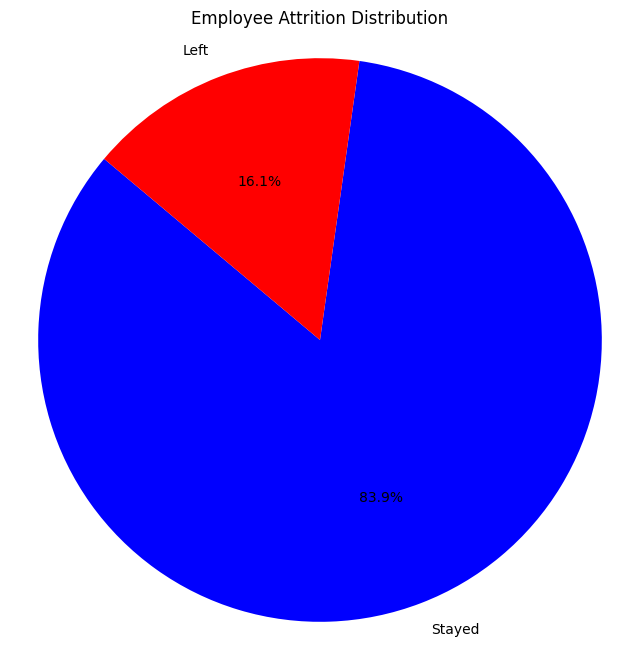

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')
attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')  
plt.show()


- Why Chosen: Pie charts provide a visual representation of proportions, making it easy to see the ratio of employees who have stayed versus those who have left the company.

- Explanation: The pie chart illustrates the distribution of employee attrition, clearly showing the percentage of employees who have stayed compared to those who have left. This visualization helps to quickly assess the overall attrition rate and can highlight potential areas of concern regarding employee retention within the organization.

-**2. Histogram for Numerical Variables**:

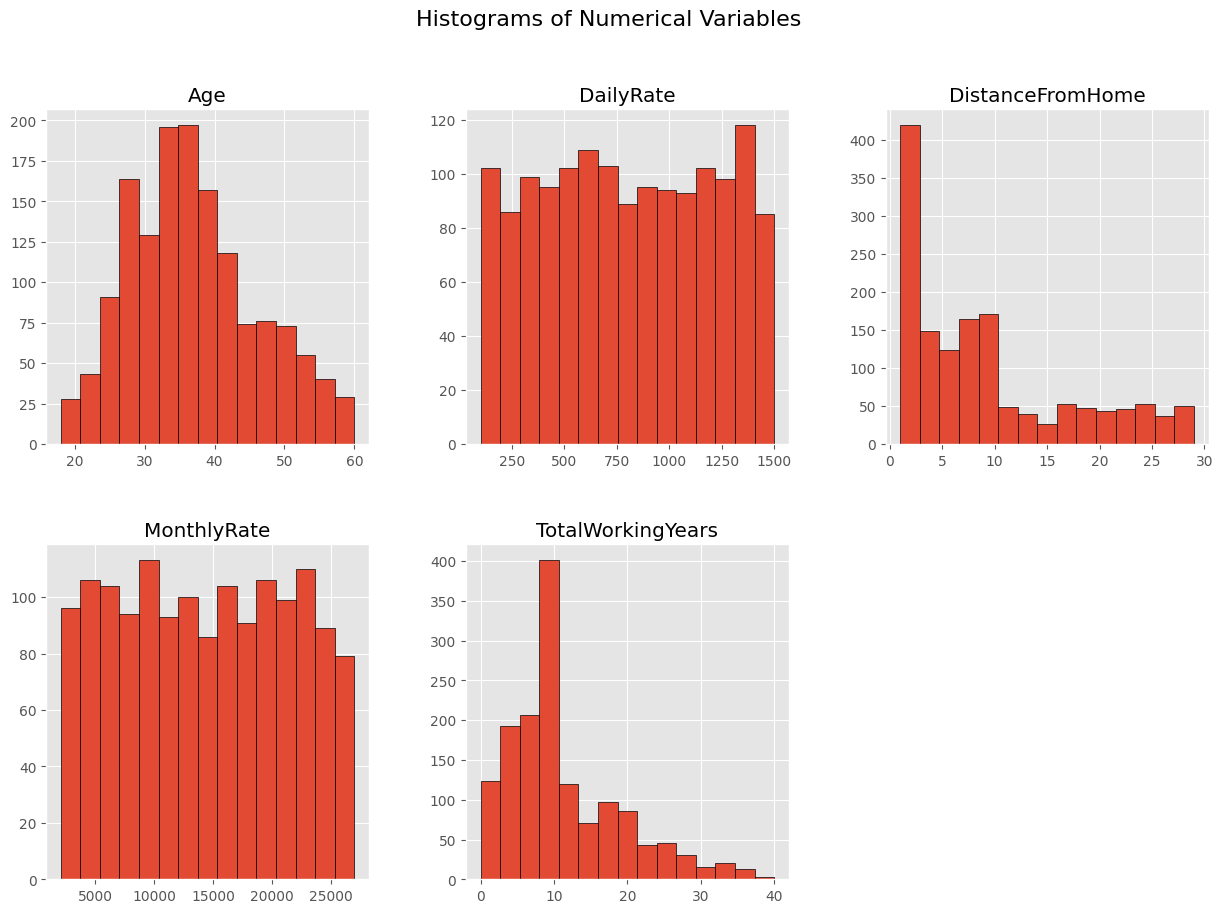

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

plt.style.use('ggplot')

numerical_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyRate', 'TotalWorkingYears']
df[numerical_vars].hist(bins=15, figsize=(15, 10), layout=(2, 3), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

- Why Chosen: Histograms provide a visual representation of the distribution of continuous data. This helps to identify the shape of the data distribution (normal, skewed, etc.), detect any potential outliers, and understand the variability in each numerical variable.

- Explanation: Each histogram gives insight into how values in a particular numerical feature are spread. For example, the age distribution may show whether the company has more young or older employees. This is essential to understand the range, frequency, and central tendency of these features, which can impact attrition analysis.

-**3. Scatter plot**:

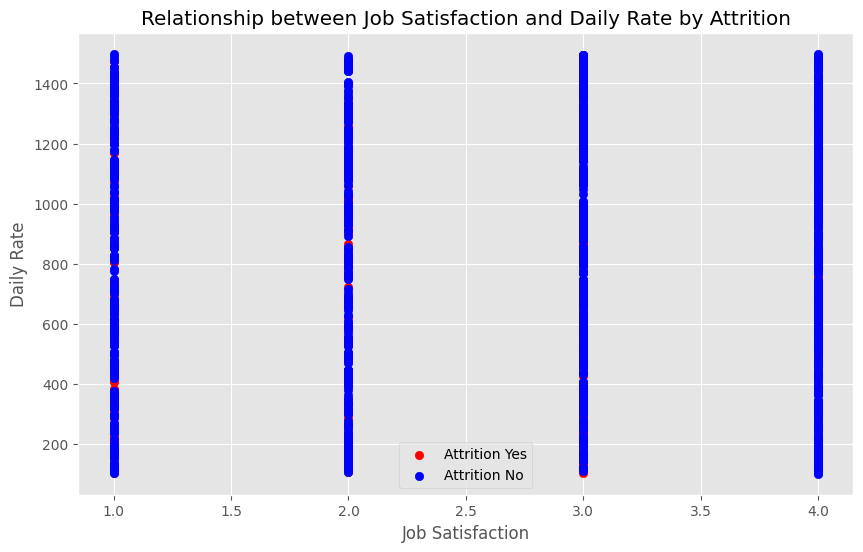

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Attrition'] == 'Yes']['JobSatisfaction'], df[df['Attrition'] == 'Yes']['DailyRate'], color='red', label='Attrition Yes')
plt.scatter(df[df['Attrition'] == 'No']['JobSatisfaction'], df[df['Attrition'] == 'No']['DailyRate'], color='blue', label='Attrition No')
plt.xlabel('Job Satisfaction')
plt.ylabel('Daily Rate')
plt.title('Relationship between Job Satisfaction and Daily Rate by Attrition')
plt.legend()
plt.grid(True)
plt.show()

- Why Chosen:
Scatter plots provide a clear way to visualize the relationship between two variables. They help to identify trends, correlations, or lack thereof, as well as detect potential clusters or outliers within the data. This is useful in understanding how different variables interact with each other, particularly in examining employee behaviors or trends in the dataset.

- Explanation:
This scatter plot explores how Total Working Years and Monthly Income are connected. It helps to see whether employees with more experience tend to earn higher incomes, which can be an important factor in workforce planning and retention strategies. By looking at the distribution of data points, you can determine if the relationship is linear or if there are other patterns such as outliers or varying levels of income regardless of experience.

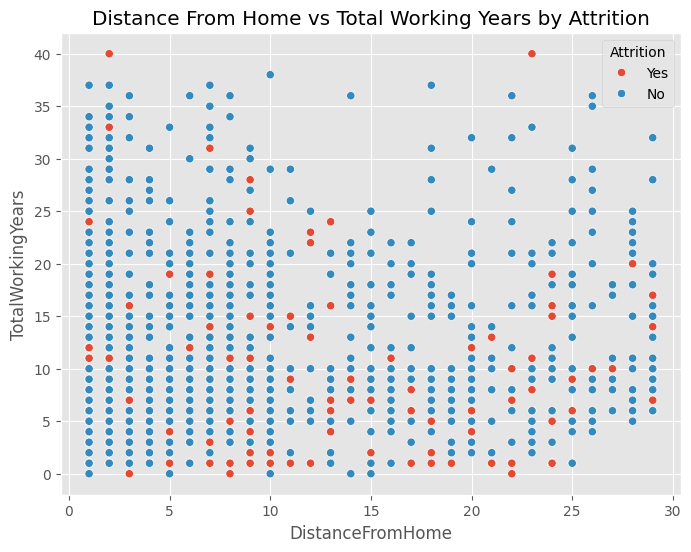

In [11]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=df['DistanceFromHome'], y=df['TotalWorkingYears'], hue=df['Attrition']) 
plt.title('Distance From Home vs Total Working Years by Attrition') 
plt.xlabel('DistanceFromHome') 
plt.ylabel('TotalWorkingYears') 
plt.show()

- Why Chosen: A scatter plot was selected to visualize the relationship between **Distance From Home** and **Total Working Years**, highlighting differences in **Attrition** using color for easy comparison.

- Explanation:The plot helps identify trends in how **Distance From Home** affects employee retention. Blue dots (left the company) and red dots (stayed) show if employees with longer commutes or fewer working years are more likely to leave. This visualization makes it easier to see if distance and tenure have any correlation with attrition.

-**4. Bar plot for Categorical Variables**:

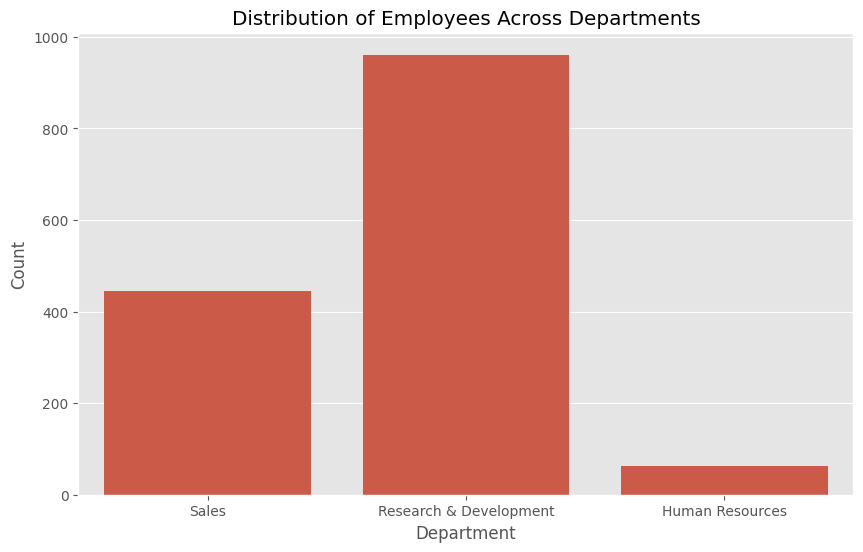

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department')
plt.title('Distribution of Employees Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

- WWhy Chosen: Bar plots are ideal for visualizing distributions across categories. They are particularly effective in showing how frequently each category occurs, which is useful for categorical variables like Department.

- Explanation: The bar chart for the Department variable helps to visualize how employees are distributed across departments. This can highlight if certain departments have a higher concentration of employees, which might relate to attrition. This makes it easier to spot trends and potential areas of concern in the dataset.

-**5. Boxplot for Monthly Rate Across Job Roles**:

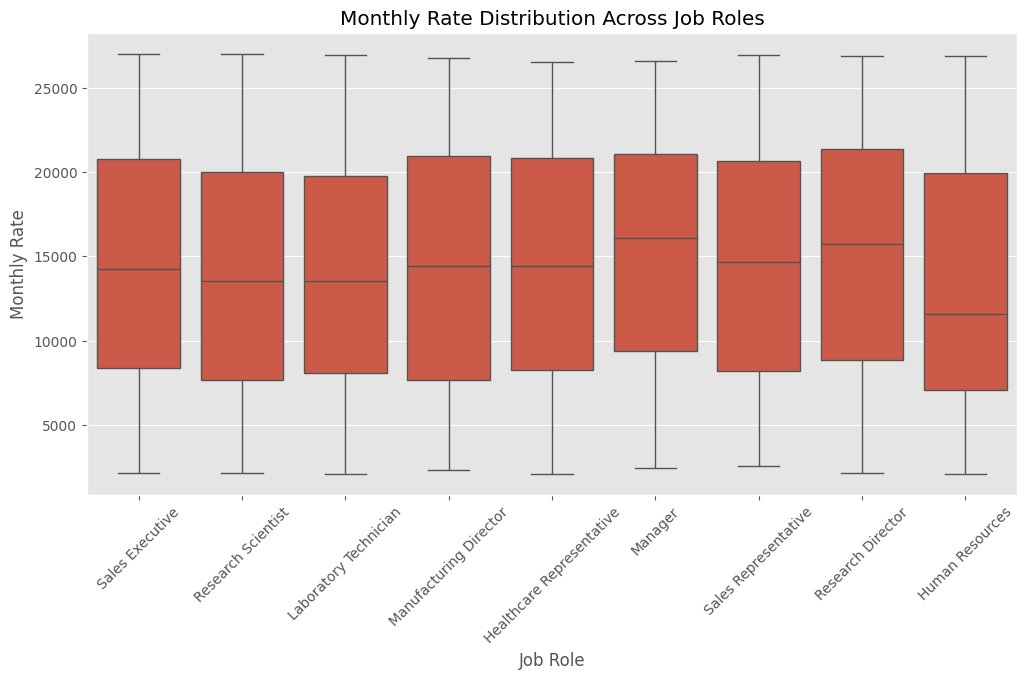

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyRate')
plt.xticks(rotation=45)
plt.title('Monthly Rate Distribution Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Monthly Rate')
plt.show()

- Why Chosen:The boxplot clearly illustrates the distribution of monthly salaries across various job roles, highlighting the median, quartiles, and range of values.

- Explanation: This visualization helps identify salary disparities between roles, which can be useful for analyzing potential correlations with employee attrition. Roles with lower median salaries, for example, might be more prone to higher attrition rates, suggesting that compensation may influence turnover.

These visualizations collectively help in exploring the relationships between key variables and the target outcome (attrition). By understanding these distributions and differences, we can gain insight into which variables might influence attrition and further tailor our analysis or model to focus on these factors.

## 4. Data Preprocessing


### **1. Why Does the Data Require Preprocessing?**

**The dataset requires preprocessing for the following reasons:**

1. **Presence of Categorical Data:**
   - The dataset contains categorical columns such as `Attrition`, `OverTime`, and `Gender`. These need to be converted into numerical values as predictive models rely on numerical input.

2. **Differences in Numerical Value Ranges:**
   - Some numerical columns, such as `MonthlyIncome` and `DistanceFromHome`, have widely varying ranges. Without normalization, this could negatively affect the performance of models sensitive to scale.

3. **Presence of Outliers:**
   - Outliers were identified in columns like `MonthlyIncome`. These outliers can significantly skew averages and statistical models.

4. **Enhancing Data Quality:**
   - Preprocessing ensures that the data is clean and ready for analysis and modeling, reducing errors caused by wide variations or the influence of outliers.

**Therefore, the data requires cleaning and transformation to ensure its quality and effective use in analysis and modeling.**

---


### **2. Steps Taken in Data Preprocessing**

The following preprocessing steps were applied to improve the dataset's quality and ensure its suitability for analysis and modeling:

1. **Encoding Categorical Data**:
   - **Why**: Categorical data needs to be converted into numerical format to enable meaningful computations and comparisons
   - **How**: 
     - Converted categorical attributes (`Attrition`, `OverTime`, `Gender`) into numerical values using **Label Encoding**.
     - Example:
       - `Attrition`: Encoded as `1` for "Yes" and `0` for "No".
       - `OverTime`: Encoded as `1` for "Yes" and `0` for "No".
       - `Gender`: Encoded as `1` for "Male" and `0` for "Female".

2. **Normalization of Numerical Attributes**:
   - **Why**: To standardize attributes with varying ranges, such as `MonthlyIncome` and `DistanceFromHome`, which may affect models sensitive to scale.
   - **How**: Applied **Decimal Scaling Normalization** to scale values within a comparable range.

3. **Outlier Handling**:
   - **Why**: To minimize the influence of extreme values (outliers) that could skew the results.
   - **How**: Used **capping** to adjust values in `MonthlyIncome` to the 95th percentile, ensuring they remain within a reasonable range.

---

### **3. Justification for Techniques Used**

1. **Categorical Encoding**:
   - Necessary to prepare categorical data for numerical processing.
   - Ensures that the models can correctly interpret categorical differences.

2. **Normalization**:
   - Helps to reduce the influence of scale differences among numerical features.
   - Improves the performance of models like logistic regression and k-means clustering, which are sensitive to value ranges.

3. **Outlier Handling**:
   - Reduces the effect of extreme values on model training and statistical analysis.
   - Ensures that outliers do not dominate the results, improving the robustness of the analysis.

These preprocessing steps ensure the data is clean, consistent, and ready for effective modeling and analysis.

---



### **4. Snapshots of Raw and Processed Data**

#### **Raw Dataset**
The raw dataset contains unprocessed data as it appears before any modifications. Key characteristics include:
- Presence of categorical attributes like `Attrition`, `Gender`, and `OverTime` in their original text format.
- Numerical attributes like `MonthlyIncome` and `DistanceFromHome` with wide value ranges.
- Presence of potential outliers in some attributes.

**Snapshot of the Raw Dataset**  
Below is a snapshot of the first 10 rows from the raw dataset. This represents the data before any preprocessing was applied.  
[Download Raw Dataset Snapshot](sandbox:/mnt/data/Updated_Raw_Dataset.csv)

---

#### **Processed Dataset**
The processed dataset contains data after applying the preprocessing steps. Key changes include:
1. **Encoded categorical attributes**:
   - `Attrition`, `Gender`, and `OverTime` converted to numerical values.
2. **Normalized numerical attributes**:
   - Scaled `MonthlyIncome` and `DistanceFromHome` using Decimal Scaling Normalization.
3. **Adjusted outliers**:
   - Applied capping to `MonthlyIncome` to address extreme values.

**Snapshot of the Processed Dataset**  
Below is a snapshot of the first 10 rows from the processed dataset. This represents the data after preprocessing.  
[Download Processed Dataset Snapshot](sandbox:/mnt/data/Updated_Processed_Dataset.csv)

---

#### **Summary of Changes**
- Categorical attributes are now numeric, making them usable for machine learning models.
- Numerical features are standardized to comparable scales.
- Outliers have been adjusted to minimize their impact on the analysis and modeling.

These changes ensure the dataset is clean, consistent, and ready for effective analysis and modeling. 

## 5. Data Mining Techniques


## 6. Evaluation and Comparison

### - Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
df = pd.read_csv("AfterBalance.csv")

# Convert categorical features to numerical using one-hot encoding
df_d = pd.get_dummies(df, drop_first=True)

# Extract the features (excluding the target variable, if any)
features = df_d.drop('Attrition', axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
        Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.550405   0.781210         -1.051326  -0.844301            0.0   
1  0.123354   1.477211         -0.930097  -0.844301            0.0   
2 -0.837510  -1.784493          1.736919   0.131922            0.0   
3  0.016591   1.079129         -0.081501   1.108145            0.0   
4 -0.196934  -0.253803         -0.445185  -1.820523            0.0   

   EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
0       -1.708705                -0.550356 -1.215314    1.441610   
1       -1.703590                 1.220354  0.822833    1.341770   
2       -1.678016                 0.334999  0.822833   -0.754872   
3       -1.664376                 0.334999  0.822833    0.842569   
4       -1.657557                -0.550356  0.822833    0.892489   

   JobInvolvement  ...  JobRole_Manager  JobRole_Manufacturing Director  \
0        0.398918  ...        -0.239046                        -0.32323   
1

### the choice for the three different sizes of K-means clustering


We will choose 3 different sizes based on the result of the validation methods that we will apply then we will use these sizes to perform the k-means clustering, one of the numbers should be relatively large, the second should be in the middle and the last should be small. This way we hope that we will cover the possible best outcomes and clustering results.



### Silhouette method


The Silhouette method is a technique used to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to neighboring clusters. The Silhouette score ranges from -1 to 1, with higher scores indicating better-defined and well-separated clusters. It helps determine the optimal number of clusters in unsupervised learning tasks.



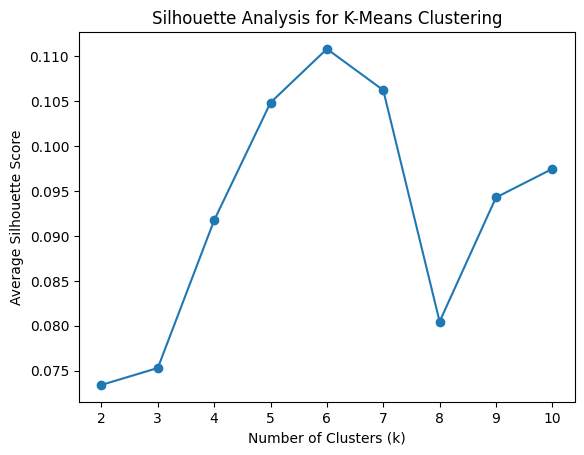

The highest average Silhouette score is 0.11082964666755879 with k=6.
The second highest average Silhouette score is 0.10623620382282285 with k=7.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")

The optimal value for k in clustering the data using K-means is k=6, based on the highest Silhouette score. This will be our first choice for performing clustering on our data.

### Elbow method


The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.



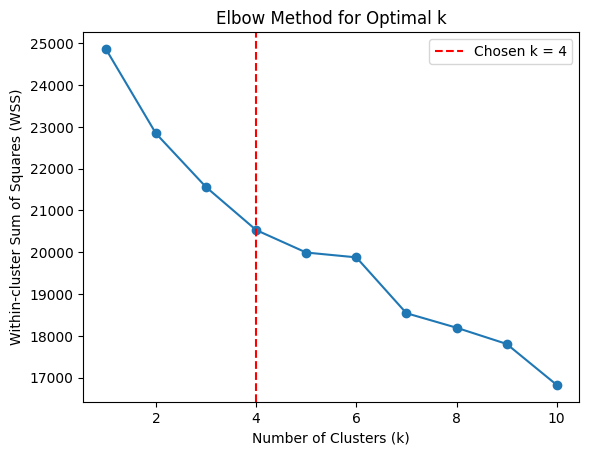

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator

# Assuming df_scaled is already created and contains numerical data
X = df_scaled

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto'))
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to locate the turning point
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


Based on the Elbow Method for determining the optimal number of clusters, the results indicate that the optimal number of clusters is **4**. This is determined by the point of inflection in the plot, where the Within-cluster Sum of Squares (WSS) starts to decrease more slowly after k=4. This suggests that adding more clusters beyond this point will not significantly reduce the variance within the clusters, making **k=4** the best choice for optimal data partitioning.

### k-means clustering, visualization, and evaluation:


In this section, we will perform k-means clustering and visualize its result using three different k’s that have been chosen beforehand, then we will compute WSS and Bcubed preceision and recall and average silhouette for each cluster as methods of evaluating clustering results.


### K=4


- Chosen based on the Elbow method, as it appears to be a turning point with a reasonable drop in within-cluster sum of squares (WSS).


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AfterBalance.csv")

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 9.87464660e-01 -4.13132433e-01 -3.83628202e-02 -8.15012766e-02
   1.92935908e-01  0.00000000e+00 -1.43216700e-01  1.87440016e-01
  -1.96240460e-01 -2.43135309e-03  1.27561120e-02  1.71752586e+00
  -1.04702594e-01  1.32422483e-01  2.47623489e-01  1.43864985e-01
  -1.32631258e-01  0.00000000e+00  1.15889392e-01  0.00000000e+00
  -8.37290927e-02 -1.34678048e-01 -5.73877720e-03  1.23387247e+00
   1.02443580e+00 -1.48947658e-01  1.59375132e-01  1.65456670e-01
  -1.79014949e-01 -1.42003743e-02 -7.10654284e-02  9.46382832e-02
  -9.32413757e-02  9.83958077e-03 -1.22994407e-01 -4.80384461e-01
   1.23506956e+00  2.46270451e-01  1.10736018e+00 -4.72869274e-01
  -2.86882073e-01 -2.86822088e-01  1.64509519e-01 -1.16853600e-01
  -7.97094170e-01 -6.68904151e-01]
 [-1.91122192e-01  7.99611160e-02  7.42506197e-03  1.57744406e-02
  -3.73424339e-02  0.00000000e+00  2.77193613e-02 -3.62787128e-02
   3.79820245e-02  4.70584469e-04 -2.46892490e-03 -3.32424360e-01
   2.02650181e-02 -2.563

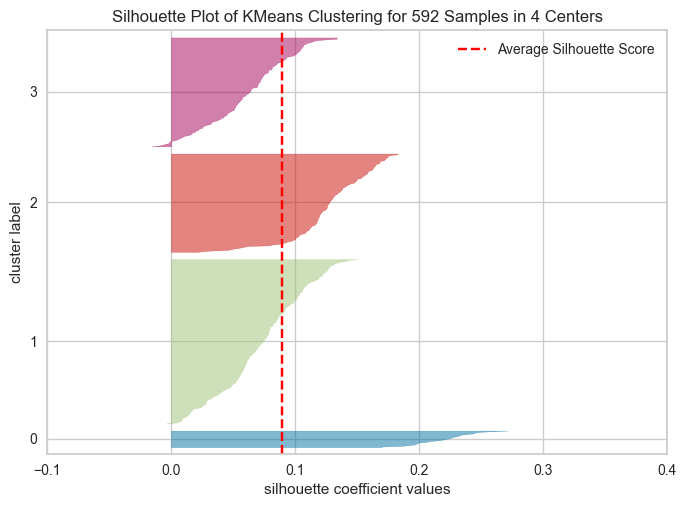

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 592 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=4, n_init='auto')  # K-means with 2 clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the model and visualize
visualizer.fit(df_scaled)
visualizer.show()


---
Based on the silhouette plot for KMeans clustering with 592 samples divided into 4 centers, the fact that most silhouette scores are positive indicates that the samples are well-matched to their clusters and are distant from neighboring clusters. This suggests that the clustering solution has effectively separated the data points into distinct and well-defined clusters.

However, it is important to note that while having mostly positive silhouette scores is a positive indicator, it does not necessarily imply that the clustering solution is "perfect" or without flaws. There may still be some degree of overlap or ambiguity between clusters, especially if there are samples, as shown in the first center, with silhouette scores close to 0 or even negative values.

---

### K=6 


This value corresponds to the highest average Silhouette score, indicating strong cluster cohesion and separation.


In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=6
kmeans = KMeans(n_clusters=6, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[ 1.12447313e+00 -5.15946918e-01 -1.31326237e-01 -5.76531397e-02
   1.31921989e-01  0.00000000e+00 -2.23117029e-01  3.02048439e-02
  -2.12946579e-01  9.94972443e-02  1.28815819e-01  2.04648303e+00
  -1.67604441e-01  1.96883586e-01  2.95287000e-01  1.42084120e-01
  -2.09932144e-01  0.00000000e+00  1.72031956e-01  0.00000000e+00
   1.12715346e-02 -1.99820386e-02  1.75964080e-01  1.12629014e+00
   8.06716470e-01 -2.66312114e-01  1.58631515e-01  2.26237451e-01
  -2.57194592e-01 -1.59230427e-02 -5.60929308e-03  1.05662806e-01
  -1.16217350e-01 -9.37912945e-02 -1.82095616e-01 -4.80384461e-01
   2.08087341e+00 -3.23229968e-01  1.86570573e+00 -4.98944033e-01
  -5.56537971e-01 -2.86822088e-01  1.72079374e-01 -1.99841893e-01
  -7.97094170e-01 -6.68904151e-01]
 [ 2.63035362e-01 -5.27936133e-01 -4.08080279e-02 -9.86752475e-02
   1.88868314e-01  0.00000000e+00  1.39973478e-01  2.75975513e-01
  -7.73485788e-02 -2.72873708e-02  4.42211881e-02  3.32759056e-01
   5.24762402e-02  5.989

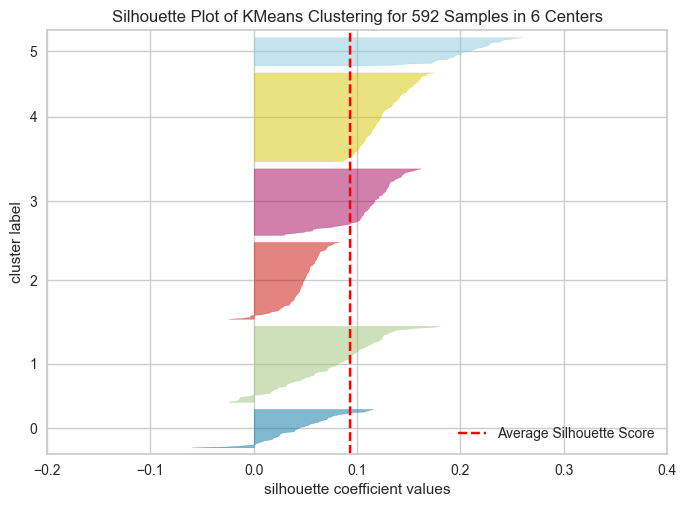

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 592 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=6, n_init='auto')  # K-means with 6 clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the model and visualize
visualizer.fit(df_scaled)
visualizer.show()

---
Based on the silhouette plot for KMeans clustering with 592 samples divided into 6 centers, the fact that most silhouette scores are positive indicates that the samples are well-matched to their clusters and are distant from neighboring clusters. This suggests that the clustering solution has effectively separated the data points into distinct and well-defined clusters.

However, it is important to note that while having mostly positive silhouette scores is a positive indicator, it does not necessarily imply that the clustering solution is "perfect" or without flaws. There may still be some degree of overlap or ambiguity between clusters, especially if there are samples, as shown in some centers, with silhouette scores close to 0 or even negative values.

---



In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 18995.167205329
Average Silhouette Score: 0.10896548942610029



---

**WSS (Within-cluster Sum of Squares):** 18995.17 – This relatively high value indicates that the clusters may not be perfectly compact, suggesting a degree of dispersion or spread within the clusters. There may be overlap or a lack of clear separation between some of the clusters.

**Average Silhouette Score:** 0.109 – This relatively average silhouette score suggests that the clustering solution is somewhat effective. While some data points may be well-clustered, there is a possibility of overlap or ambiguity in cluster assignments. This implies that adjusting the number of clusters or using alternative techniques might improve the results and lead to more distinct and well-defined clusters.

---


### K=7


- The second highest average Silhouette score, providing an alternative with potentially meaningful clustering.


In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=7
kmeans = KMeans(n_clusters=7, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[ 8.66586717e-01 -6.60074864e-01 -1.32251256e-03  1.05003384e-01
   2.44563071e-01  0.00000000e+00 -2.05736553e-01  9.66343781e-02
  -2.74630711e-01 -1.82711482e-01  2.93301371e-01  1.81470512e+00
  -1.60888692e-01  1.21335711e-01  3.79389848e-01  1.35508620e-01
  -1.20033812e-01  0.00000000e+00 -3.63995298e-02  0.00000000e+00
   1.37755195e-01  3.18120642e-02  3.24196768e-01  7.55986219e-01
   3.07407915e-01 -3.19311226e-01  4.07113872e-01  7.69023959e-01
  -7.08899197e-01  1.32915504e-01 -3.63223301e-01  1.46368736e-01
  -2.01724130e-03  1.23854863e-02 -1.82095616e-01 -4.80384461e-01
  -2.39045722e-01 -3.23229968e-01  4.66575083e+00 -4.98944033e-01
  -5.56537971e-01 -2.86822088e-01  1.22531228e-01 -2.65596896e-01
  -7.97094170e-01 -6.68904151e-01]
 [ 2.96413050e-01 -4.71425829e-01 -5.12619942e-02 -8.54118582e-02
   1.55540280e-01  0.00000000e+00  1.36257906e-01  2.77879502e-01
  -4.83104697e-02 -1.61358790e-02  2.24447718e-02  3.76481218e-01
   3.45811168e-02  3.670


---

From the silhouette plot of KMeans clustering with 592 samples divided into 7 centers, we observe that most of the silhouette scores are positive, indicating that many samples are well-matched to their respective clusters and are sufficiently distant from neighboring clusters. The separation between clusters appears reasonable, with clear distinction in some clusters, while others may experience slight overlap or ambiguity at the boundaries.

The average silhouette score reflects a certain level of effectiveness in clustering; however, the presence of some samples with silhouette scores close to 0 or negative suggests potential overlap or unclear separation between a few clusters. This implies that there is room for improvement in the clustering solution, either by adjusting the number of clusters or exploring alternative clustering techniques to reduce overlap and enhance cluster distinctiveness.

---



In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 18498.951342865512
Average Silhouette Score: 0.10390905122421978



---

**WSS (Within-cluster Sum of Squares):** 18498.95 - While relatively high, this result indicates that the clustering process has effectively created multiple clusters and achieved meaningful grouping of diverse data points. The resulting clusters highlight variations between points and offer a comprehensive view of the data structure, which can be valuable for various analytical contexts.

**Average Silhouette Score:** 0.104 - This score reflects that many data points have been well-assigned to their respective clusters, demonstrating benefits in classifying and segmenting data into defined groups. It suggests that the clustering process has managed to organize a significant portion of the data logically and reasonably, with room for further improvement in fine-tuning the separation between clusters.

---



---

### Evaluate the best models of Clustering:

|               | K=4         | K=6         | K=7         |
|---------------|-------------|-------------|-------------|
| **WSS**       | 20726.43    | 18995.17    | 18498.95    |
| **Average Silhouette Score** | 0.0906     | 0.109       | 0.104       |

---

**Evaluation Summary:**

After analyzing the new clustering results, we've determined that **K=6** is the best choice for our clustering model. This conclusion is based on the combination of the **Silhouette Score** and **WSS** values. Although **K=4** has a slightly higher silhouette score, **K=6** demonstrates a better balance between compactness and separation, with a relatively low WSS of 18995.17, indicating well-defined clusters.

Additionally, the **Silhouette Score** for **K=6** of **0.109** indicates that the clusters are reasonably well-separated. Therefore, we choose **K=6** as the optimal number of clusters for this dataset.

## 7. Findings


## 8. References
- IBM HR Analytics Dataset: Kaggle
